In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [6]:
%pwd

'/mnt/c/Users/sv/source/Enhancement/Image-Enchancer/Experiments'

In [7]:
os.chdir("..")

In [1]:
def detect_blur_fft(image, size=60, thresh=10):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the FFT of the image
    fft = np.fft.fft2(gray)
    fft_shift = np.fft.fftshift(fft)
    
    # Calculate the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(fft_shift))

    # Remove the low frequencies by setting the center square of size (size x size) to zero
    h, w = gray.shape
    half_h, half_w = int(h / 2), int(w / 2)
    fft_shift[half_h - size:half_h + size, half_w - size:half_w + size] = 0

    # Inverse FFT to reconstruct the image without low frequencies
    fft_shift = np.fft.ifftshift(fft_shift)
    recon = np.fft.ifft2(fft_shift)
    recon = np.abs(recon)
    
    # Compute the mean of the magnitude spectrum (blur score)
    mean_val = np.mean(magnitude_spectrum)
    blur = mean_val < thresh
    
    return blur, magnitude_spectrum, mean_val

In [2]:
def analyze_dataset_blur_fft(dataset_path, size=60, thresh=10, blurry_folder='blurry', non_blurry_folder='non_blurry'):
    results = []

    # Create output directories if they do not exist
    if not os.path.exists(blurry_folder):
        os.makedirs(blurry_folder)
    if not os.path.exists(non_blurry_folder):
        os.makedirs(non_blurry_folder)

    # Iterate through all files in the dataset directory
    for filename in os.listdir(dataset_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust as needed for your dataset
            image_path = os.path.join(dataset_path, filename)
            
            # Read the image
            image = cv2.imread(image_path)
            
            # Detect blur using FFT
            is_blurry, magnitude_spectrum, mean_val = detect_blur_fft(image, size=size, thresh=thresh)
            
            # Move the image to the appropriate folder
            if is_blurry:
                shutil.copy(image_path, os.path.join(blurry_folder, filename))
            else:
                shutil.copy(image_path, os.path.join(non_blurry_folder, filename))

            # Store the result
            results.append({
                "image": filename,
                "is_blurry": is_blurry,
                "mean_val": mean_val
            })

    return results

In [3]:
def analyze_results(results):
    total_images = len(results)
    blurry_images = sum(1 for result in results if result['is_blurry'])
    not_blurry_images = total_images - blurry_images

    print(f"Total Images: {total_images}")
    print(f"Blurry Images: {blurry_images} ({(blurry_images / total_images) * 100:.2f}%)")
    print(f"Not Blurry Images: {not_blurry_images} ({(not_blurry_images / total_images) * 100:.2f}%)")

    # Plot the distribution of mean FFT magnitude values
    mean_vals = [result['mean_val'] for result in results]
    plt.hist(mean_vals, bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of FFT Mean Magnitude Values')
    plt.xlabel('Mean FFT Magnitude')
    plt.ylabel('Number of Images')
    plt.show()

    # List some example images that were detected as blurry
    blurry_examples = [result['image'] for result in results if result['is_blurry']]
    if blurry_examples:
        print(f"Examples of blurry images: {blurry_examples[:5]}")
    else:
        print("No blurry images detected.")

In [8]:
dataset_path = './blurred_images'
blurry_folder = "./Blurry_folder"
non_blurry_folder = "./Non_Blurry_folder"
results = analyze_dataset_blur_fft(dataset_path, size=30, thresh=180, blurry_folder=blurry_folder, non_blurry_folder=non_blurry_folder)

Total Images: 96
Blurry Images: 48 (50.00%)
Not Blurry Images: 48 (50.00%)


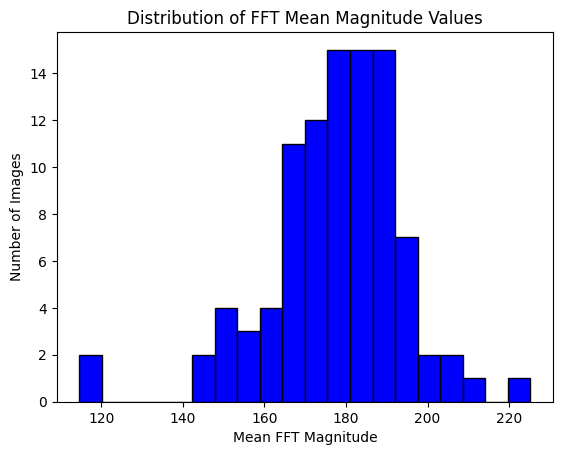

Examples of blurry images: ['blur_image6.jpg', 'blur_image_3.jpg', 'Gaussian_blur.jpg', 'image_1.jpg', 'image_10.jpg']


In [9]:
analyze_results(results)

In [8]:
import os
import cv2
import numpy as np
%pwd

'/mnt/c/Users/sv/source/Enhancement/Image-Enchancer/Images'

In [2]:
os.chdir("../Images")

In [20]:
def detect_blur_fft(image, size=50, thresh=190):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the FFT of the image
    fft = np.fft.fft2(gray)
    fft_shift = np.fft.fftshift(fft)
    
    # Calculate the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(fft_shift))

    # Remove the low frequencies by setting the center square of size (size x size) to zero
    h, w = gray.shape
    half_h, half_w = int(h / 2), int(w / 2)
    fft_shift[half_h - size:half_h + size, half_w - size:half_w + size] = 0

    # Inverse FFT to reconstruct the image without low frequencies
    fft_shift = np.fft.ifftshift(fft_shift)
    recon = np.fft.ifft2(fft_shift)
    recon = np.abs(recon)
    
    # Compute the mean of the magnitude spectrum (blur score)
    mean_val = np.mean(magnitude_spectrum)
    print(mean_val)
    blur = mean_val < thresh
    
    return blur, magnitude_spectrum, mean_val


In [21]:
image_path = "jack.jpg"
image = cv2.imread(image_path)
is_blurry, magnitude_spectrum, mean_val = detect_blur_fft(image)

print(f"Is the image blurry? {'Yes' if is_blurry else 'No'}")
print(f"Blur Score (Mean of Magnitude Spectrum): {mean_val}")

198.15742878622962
Is the image blurry? No
Blur Score (Mean of Magnitude Spectrum): 198.15742878622962
